# **CIÊNCIA DE DADOS** - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

(C) 2025-2026 CARLOS M D VIEGAS

https://github.com/cmdviegas


# Testes de Hipóteses

Este notebook apresenta conceitos fundamentais sobre testes de hipóteses aplicados à análise estatística.

Vamos abordar os seguintes testes:
- `Teste t de Student` (comparação de médias)
- `Teste qui-quadrado` (independência entre variáveis)
- `Teste z` (para proporções)
- `Teste de normalidade`

## Importação das bibliotecas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
%pip install statsmodels


np.random.seed(88) # fixa a aleatoriedade para que os resultados sejam sempre os mesmos

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Teste t de Student

O teste t de Student é uma ferramenta estatística usada para verificar se uma média observada difere significativamente de um valor hipotético ou de outra média.

A fórmula da estatística t depende do tipo de teste que está sendo feito:

### 1. Teste t para uma amostra

Usado para comparar a média de uma amostra com uma média teórica conhecida ($\mu_0$):

$$
t = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}
$$

onde:

- $\bar{X}$ = média da amostra  
- $\mu_0$ = média sob a hipótese nula ($H_0$)  
- $S$ = desvio padrão amostral  
- $n$ = tamanho da amostra  



### Teste t para duas amostras independentes (variâncias iguais)

Compara as médias de dois grupos independentes:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{S_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

com:

$$
S_p = \sqrt{ \frac{(n_1 - 1) S_1^2 + (n_2 - 1) S_2^2}{n_1 + n_2 - 2} }
$$

onde:

- $\bar{X}_1$, $\bar{X}_2$ = médias das amostras  
- $S_1$, $S_2$ = desvios padrões das amostras  
- $n_1$, $n_2$ = tamanhos das amostras  
- $S_p$ = desvio padrão conjunto (pooled)


### 3. Teste t pareado

Usado quando os dados vêm de pares (ex: antes e depois):

$$
t = \frac{\bar{D}}{S_D / \sqrt{n}}
$$

onde:

- $\bar{D}$ = média das diferenças  
- $S_D$ = desvio padrão das diferenças  
- $n$ = número de pares


### Interpretação

O valor de $t$ indica o quão extrema é a diferença observada, em unidades de erro padrão. Esse valor é então comparado com o valor crítico da distribuição $t$ com os graus de liberdade adequados:

- Se $|t|$ está além do valor crítico, rejeitamos $H_0$
- Caso contrário, não rejeitamos $H_0$



### Exemplo 1:

Uma empresa de tecnologia está testando um novo programa de treinamento para aumentar a produtividade de seus funcionários. A média histórica de produtividade é de 75 unidades/dia.

Após o treinamento, uma amostra de 25 funcionários foi avaliada, e a média de produtividade observada foi de 78,5 unidades/dia, com desvio padrão amostral de 8 unidades.

A empresa quer saber, com nível de significância de 5%, se o novo treinamento aumentou significativamente a produtividade.

### Exemplo 1 - Resolução:

Formulamos as hipóteses:
- $H_0$: μ=75 (a produtividade não aumentou)
- $H_1$: μ>75 (a produtividade aumentou)

In [19]:
# Dados do problema
media_esperada = 75      # μ₀
media_amostra = 78.5     # média observada
desvio_amostral = 8      # s
n = 25                   # tamanho da amostra
alpha = 0.05             # nível de significância

# Estatística t calculada
t_calculado = (media_amostra - media_esperada) / (desvio_amostral / np.sqrt(n))
df = n - 1  # graus de liberdade
t_critico = t.ppf(1 - alpha, df) # PPF é o contrário da CDF (diz qual valor corresponde a uma determinada probabilidade)
p_valor = 1 - t.cdf(t_calculado, df)

# Mostrar resultados
print(f"t calculado = {t_calculado:.4f}")
print(f"t crítico (α = {alpha}) = {t_critico:.4f}")
print(f"valor-p = {p_valor:.4f}")

t calculado = 2.1875
t crítico (α = 0.05) = 1.7109
valor-p = 0.0193


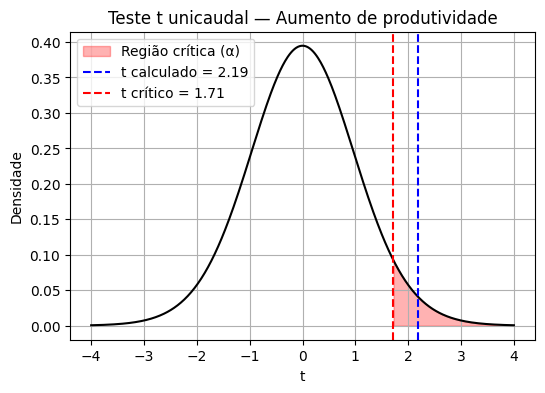

In [20]:
# Criar gráfico da distribuição t
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

plt.figure(figsize=(6, 4))
plt.plot(x, y, color='black')

# Região crítica (cauda à direita)
plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3, label='Região crítica (α)')
plt.axvline(t_calculado, color='blue', linestyle='--', label=f't calculado = {t_calculado:.2f}')
plt.axvline(t_critico, color='red', linestyle='--', label=f't crítico = {t_critico:.2f}')

# Estética
plt.title('Teste t unicaudal — Aumento de produtividade')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

### Exemplo 1 - Interpretação do resultado

Neste `teste t` unicaudal, queremos saber se o novo programa de treinamento aumentou a produtividade dos funcionários.

- Valor $t_{\text{calculado}}$: indica o quão distante a média amostral está da média histórica, em unidades de erro padrão.  
- Valor $t_{\text{crítico}}$: define o limite da zona de rejeição da hipótese nula $H_0$, com base no nível de significância $ \alpha = 0.05 $.

Regra de decisão:

- Se $t_{\text{calculado}} \geq t_{\text{crítico}}$, rejeitamos $H_0$  
  Há evidência estatística de que a produtividade aumentou.
  
- Se $t_{\text{calculado}} < t_{\text{crítico}}$, não rejeitamos $H_0$  
  Não temos evidência suficiente para afirmar que houve aumento.

Resultado do exemplo:

$$
t_{\text{calculado}} \approx 2.19 \\
t_{\text{crítico}} \approx 1.71
$$

Como:

$$
t_{\text{calculado}} > t_{\text{crítico}}
$$

Então:

- Rejeitamos a hipótese nula $H_0$.  

- Há evidência estatística, com 95% de confiança, de que o treinamento aumentou a produtividade média dos funcionários.  

<br><br>

| Situação                                    | Relação numérica     | Decisão                 | Interpretação                                            |
| ------------------------------------------- | -------------------- | ----------------------- | -------------------------------------------------------- |
| $ t_{\text{calculado}} < t_{\text{crítico}} $       | $ p > \alpha $       | Não rejeita $H_0$ | O resultado é provável sob $H_0$                       |
| $ t_{\text{calculado}} \approx t_{\text{crítico}} $ | $ p \approx \alpha $ | Zona limite             | Evidência fraca contra $H_0$                           |
| $ t_{\text{calculado}} > t_{\text{crítico}} $       | $ p < \alpha $       | Rejeita $H_0$     | O resultado é raro sob $H_0$; há evidência estatística |


### Exemplo 2:

Um centro educacional afirma que seus alunos atingem, em média, nota 70 no teste final. Um avaliador quer verificar se os alunos realmente estão atingindo uma média superior a 70 após uma nova intervenção pedagógica.

Foi selecionada uma amostra de 20 alunos, com:

- Média observada de 71,2 pontos
- Desvio padrão amostral de 4,5 pontos

Usando um nível de significância de 5%, o avaliador deseja saber se há evidência estatística de que a média dos alunos é maior que 70.

### Exemplo 2 - Resolução:

Hipóteses:

- $ H_0: \mu = 70 $ (a média não aumentou)
- $ H_1: \mu > 70 $ (a média aumentou)

In [21]:
# Dados do problema
media_esperada = 70
media_amostra = 71.2
desvio_amostral = 4.5
n = 20
alpha = 0.05

# Estatística t calculada
t_calculado = (media_amostra - media_esperada) / (desvio_amostral / np.sqrt(n))
df = n - 1
t_critico = t.ppf(1 - alpha, df)
p_valor = 1 - t.cdf(t_calculado, df)

print(f"t calculado = {t_calculado:.4f}")
print(f"t crítico (α = {alpha}) = {t_critico:.4f}")
print(f"valor-p = {p_valor:.4f}")

t calculado = 1.1926
t crítico (α = 0.05) = 1.7291
valor-p = 0.1239


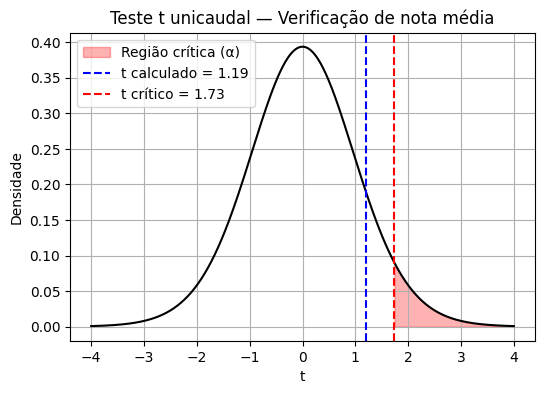

In [22]:
# Gráfico
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

plt.figure(figsize=(6, 4))
plt.plot(x, y, color='black')

# Região crítica (unicaudal à direita)
plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3, label='Região crítica (α)')
plt.axvline(t_calculado, color='blue', linestyle='--', label=f't calculado = {t_calculado:.2f}')
plt.axvline(t_critico, color='red', linestyle='--', label=f't crítico = {t_critico:.2f}')

plt.title('Teste t unicaudal — Verificação de nota média')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

### Exemplo 2 - Interpretação do resultado

Neste exemplo:

$$
t_{\text{calculado}} \approx 1.19 \\
t_{\text{crítico}} \approx 1.729
$$

Como o valor de $t$ calculado está dentro da região de aceitação, não há evidência estatística suficiente para afirmar que a média dos alunos é maior que 70.

Portanto, não rejeitamos a hipótese nula $H_0$.


## Testes Qui-Quadrado (χ²)

O teste qui-quadrado é utilizado para avaliar relações entre variáveis categóricas. Existem duas aplicações principais:

- Teste de independência em tabelas de contingência
- Teste de aderência (ou bondade de ajuste) a uma distribuição teórica

### 1. Teste de independência

Usado para verificar se há associação entre duas variáveis categóricas. Parte da seguinte hipótese:

- $H_0$: as variáveis são independentes
- $H_1$: as variáveis são dependentes (há associação)

#### Tabela de contingência

Para aplicar o teste de independência, é necessário construir uma **tabela de contingência**, que resume as frequências observadas para todas as combinações possíveis entre duas variáveis categóricas.

Cada célula da tabela representa a contagem de ocorrências de uma combinação específica entre as categorias das variáveis. A partir dessa tabela, calculam-se:

- As frequências observadas ($O_{ij}$), diretamente da tabela.
- As frequências esperadas ($E_{ij}$), assumindo independência entre as variáveis:

$$
E_{ij} = \frac{(\text{soma da linha}_i) \cdot (\text{soma da coluna}_j)}{\text{total geral}}
$$

A estatística do teste compara os valores observados e esperados para todas as células da tabela.


A estatística de teste é:

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

onde:

- $O$ = frequência observada
- $E$ = frequência esperada (calculada com base nas margens da tabela de contingência)

Quanto maior o valor de $\chi^2$, maior a evidência contra a hipótese nula.

##### Exemplo ilustrativo

Considere a seguinte tabela de contingência:

|              | Produto A | Produto B | Total |
|--------------|-----------|-----------|-------|
| Masculino    |    20     |    10     |  30   |
| Feminino     |    30     |    40     |  70   |
| Total    |    50     |    50     | 100   |

A frequência esperada para a célula "Masculino & Produto A" é:

$$
E_{11} = \frac{30 \times 50}{100} = 15
$$

Com isso, aplica-se a fórmula do teste qui-quadrado usando todas as células.


### 2. Teste de aderência

Usado para verificar se a distribuição observada de uma variável categórica segue uma distribuição teórica específica.

- $H_0$: a distribuição observada segue a distribuição teórica
- $H_1$: a distribuição observada não segue a distribuição teórica

A fórmula da estatística é a mesma:

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

A diferença está na forma de calcular os valores esperados $E$, que vêm da proporção teórica.

### Interpretação

O valor da estatística $\chi^2$ é comparado com o valor crítico da distribuição qui-quadrado com $df$ graus de liberdade.

- Se $\chi^2_{\text{calculado}} \geq \chi^2_{\text{crítico}}$, rejeita-se $H_0$
- Caso contrário, não se rejeita $H_0$

O valor de $df$ (graus de liberdade) depende do teste:

- Para tabelas de contingência: $df = (r - 1)(c - 1)$
- Para teste de aderência: $df = k - 1 - p$, onde:
  - $k$ = número de categorias
  - $p$ = número de parâmetros estimados da distribuição teórica

### Exemplo 3:

Uma empresa deseja saber se o tipo de contrato de seus funcionários (CLT ou PJ) está associado ao setor onde eles atuam (TI, RH ou Vendas).

A tabela a seguir apresenta os dados coletados de uma amostra de 60 funcionários:

| Setor  | CLT | PJ |
|--------|-----|----|
| TI     | 10  | 10 |
| RH     | 8   | 12 |
| Vendas | 15  | 5  |

Deseja-se testar, com nível de significância de 5%, se existe associação entre o setor e o tipo de contrato.

### Exemplo 3 - Resolução:

Hipóteses:

- $H_0$: as variáveis são independentes
- $H_1$: as variáveis são associadas



In [23]:
from scipy.stats import chi2_contingency, chi2

# Dados da tabela de contingência
dados = np.array([
    [10, 10],  # TI
    [8, 12],   # RH
    [15, 5]    # Vendas
])

linhas = ['TI', 'RH', 'Vendas']
colunas = ['CLT', 'PJ']
tabela = pd.DataFrame(dados, index=linhas, columns=colunas)

# Teste qui-quadrado
chi2_calculado, p_valor, df, esperadas = chi2_contingency(tabela)

# Valor crítico
alpha = 0.05
chi2_critico = chi2.ppf(1 - alpha, df)

# Resultados
print("Tabela observada:")
print(tabela)
print("\nTabela esperada sob H0:")
print(pd.DataFrame(np.round(esperadas, 2), index=linhas, columns=colunas))
print(f"\nEstatística χ² = {chi2_calculado:.4f}")
print(f"Valor crítico χ² = {chi2_critico:.4f}")
print(f"Valor-p = {p_valor:.4f}")

Tabela observada:
        CLT  PJ
TI       10  10
RH        8  12
Vendas   15   5

Tabela esperada sob H0:
         CLT   PJ
TI      11.0  9.0
RH      11.0  9.0
Vendas  11.0  9.0

Estatística χ² = 5.2525
Valor crítico χ² = 5.9915
Valor-p = 0.0723


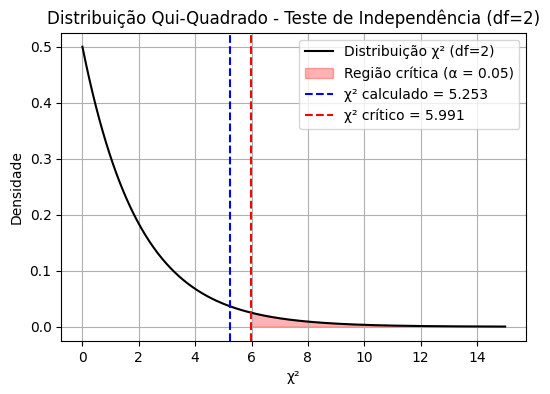

In [24]:
# Curva da distribuição χ²
x = np.linspace(0, 15, 500)
y = chi2.pdf(x, df)

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y, color='black', label=f'Distribuição χ² (df={df})')

# Região crítica (área vermelha)
plt.fill_between(x, y, where=(x >= chi2_critico), color='red', alpha=0.3, label=f'Região crítica (α = {alpha})')

# Linha para χ² calculado
plt.axvline(chi2_calculado, color='blue', linestyle='--', label=f'χ² calculado = {chi2_calculado:.3f}')
plt.axvline(chi2_critico, color='red', linestyle='--', label=f'χ² crítico = {chi2_critico:.3f}')

# Estética
plt.title('Distribuição Qui-Quadrado - Teste de Independência (df=2)')
plt.xlabel('χ²')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

### Exemplo 3 - Interpretação do resultado

Neste exemplo:

- $\chi^2_{\text{calculado}} \approx 5.2525$
- $\chi^2_{\text{crítico}} \approx 5.9915$
- $p \approx 0.0723$

Como $\chi^2_{\text{calculado}} < \chi^2_{\text{crítico}}$ e $p > \alpha$, não há evidência estatística suficiente para afirmar que o tipo de contrato está associado ao setor.

Portanto, não rejeitamos a hipótese nula $H_0$.


### Exemplo 4

Uma empresa de tecnologia realizou uma pesquisa de popularidade de linguagens de programação entre seus desenvolvedores. Os 60 entrevistados deveriam escolher apenas uma entre as seguintes linguagens: Python, JavaScript, Java, C++

A distribuição observada foi:  

- Python: 20  
- JavaScript: 15  
- Java: 13  
- C++: 12  

A empresa quer saber se existe preferência por alguma linguagem ou se as escolhas estão uniformemente distribuídas entre as 4 opções.

### Exemplo 4 - Resolução:

Hipóteses:

- $H_0$: as escolhas são uniformes (sem preferência)
- $H_1$: há preferência por alguma linguagem (distribuição não uniforme)



In [25]:
from scipy.stats import chisquare, chi2

# Frequências observadas e esperadas (uniforme)
observado = np.array([20, 15, 13, 12])
esperado = np.array([15, 15, 15, 15])  # distribuição uniforme
categorias = ['Python', 'JavaScript', 'Java', 'C++']

# Teste qui-quadrado de aderência
chi2_calculado, p_valor = chisquare(f_obs=observado, f_exp=esperado)

# Graus de liberdade = k - 1
df = len(observado) - 1
alpha = 0.05
chi2_critico = chi2.ppf(1 - alpha, df)

# Resultados
print("Frequência observada:")
print(pd.DataFrame({'Linguagem': categorias, 'Observado': observado, 'Esperado': esperado}))

print(f"\nEstatística χ² = {chi2_calculado:.4f}")
print(f"Valor crítico χ² = {chi2_critico:.4f}")
print(f"Valor-p = {p_valor:.4f}")

Frequência observada:
    Linguagem  Observado  Esperado
0      Python         20        15
1  JavaScript         15        15
2        Java         13        15
3         C++         12        15

Estatística χ² = 2.5333
Valor crítico χ² = 7.8147
Valor-p = 0.4693


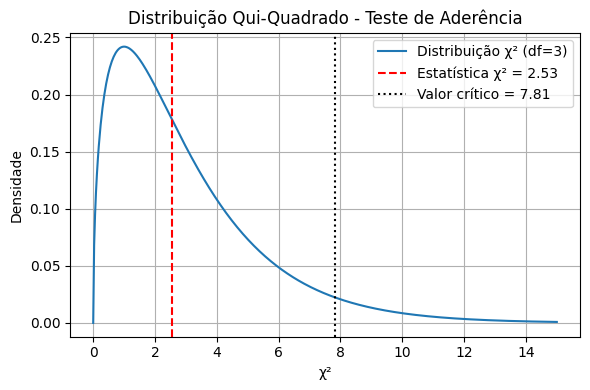

In [26]:
# Curva da distribuição χ²
x = np.linspace(0, 15, 500)
y = chi2.pdf(x, df)

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=f'Distribuição χ² (df={df})')
plt.axvline(chi2_calculado, color='red', linestyle='--', label=f'Estatística χ² = {chi2_calculado:.2f}')
plt.axvline(chi2_critico, color='black', linestyle=':', label=f'Valor crítico = {chi2_critico:.2f}')

# Estética
plt.title('Distribuição Qui-Quadrado - Teste de Aderência')
plt.xlabel('χ²')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Exemplo 4 - Interpretação:

Se o valor-p > 0.05 → Não há evidência de preferência

Se valor-p < 0.05 → Rejeita $H_0$: há evidência de preferência

## Teste Z para proporções

O teste z para proporções é usado para verificar se a proporção observada em uma amostra difere significativamente de uma proporção populacional esperada.

### 1. Teste z para uma proporção

Usado quando se quer testar se a proporção observada $\hat{p}$ é estatisticamente diferente de uma proporção teórica $p_0$.

Hipóteses:

- $H_0$: $\hat{p} = p_0$
- $H_1$: $\hat{p} \ne p_0$, ou $>$, ou $<$

Estatística de teste:

$$
z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}
$$

onde:

- $\hat{p} = \frac{x}{n}$ é a proporção observada
- $p_0$ é a proporção teórica sob $H_0$
- $n$ é o tamanho da amostra

### 2. Teste z para duas proporções

Usado para comparar duas proporções amostrais $\hat{p}_1$ e $\hat{p}_2$ de dois grupos independentes.

Hipóteses:

- $H_0$: $\hat{p}_1 = \hat{p}_2$
- $H_1$: $\hat{p}_1 \ne \hat{p}_2$, ou $>$, ou $<$

Estatística de teste:

$$
z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{p(1 - p)\left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
$$

onde:

- $p = \frac{x_1 + x_2}{n_1 + n_2}$ é a proporção combinada sob $H_0$
- $x_1$, $x_2$ são os sucessos observados em cada grupo
- $n_1$, $n_2$ são os tamanhos das amostras

### Interpretação

O valor de $z$ é comparado com o valor crítico da distribuição normal padrão $N(0, 1)$ para o nível de significância desejado $\alpha$.

- Se $|z_{\text{calculado}}| \ge z_{\text{crítico}}$, rejeita-se $H_0$
- Caso contrário, não se rejeita $H_0$

Em testes unicaudais, a comparação é feita com $z_{\text{crítico}}$ apenas em uma direção, dependendo da hipótese alternativa.


### Exemplo 5

Uma empresa de e-commerce afirma que, em média, 65% dos visitantes clicam em um banner promocional em sua página inicial.

Uma nova campanha foi testada com 200 visitantes, e 150 deles clicaram no banner.

Queremos saber, com nível de significância de 5%, se essa nova campanha resultou em uma taxa de cliques significativamente diferente de 65%.

### Exemplo 5 - Resolução:

Hipóteses:

- $H_0$: $p = 0{,}65$
- $H_1$: $p \ne 0{,}65$ (teste bicaudal)

In [27]:
from scipy.stats import norm

# Dados do problema
p_0 = 0.65        # proporção esperada sob H0
n = 200           # tamanho da amostra
x = 150           # sucessos observados
p_hat = x / n     # proporção observada
alpha = 0.05

# Estatística do teste Z
z = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / n)
z_critico = norm.ppf(1 - alpha / 2)  # teste bicaudal

# Valor-p
p_valor = 2 * (1 - norm.cdf(abs(z)))  # bicaudal

print(f"z calculado = {z:.4f}")
print(f"z crítico (±) = {z_critico:.4f}")
print(f"valor-p = {p_valor:.4f}")

z calculado = 2.9650
z crítico (±) = 1.9600
valor-p = 0.0030


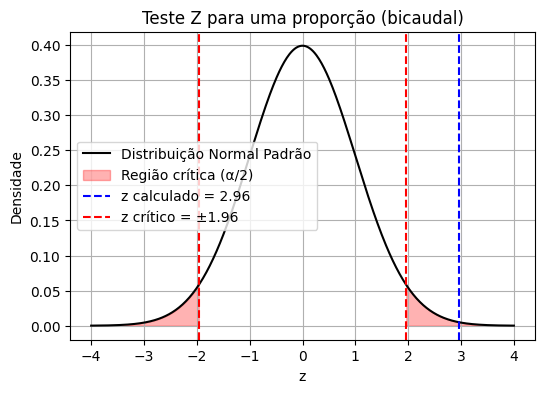

In [28]:
# Curva normal padrão
x_vals = np.linspace(-4, 4, 500)
y_vals = norm.pdf(x_vals)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, color='black', label='Distribuição Normal Padrão')

# Regiões críticas (bicaudal)
plt.fill_between(x_vals, y_vals, where=(x_vals <= -z_critico), color='red', alpha=0.3, label='Região crítica (α/2)')
plt.fill_between(x_vals, y_vals, where=(x_vals >= z_critico), color='red', alpha=0.3)

# Linhas de referência
plt.axvline(z, color='blue', linestyle='--', label=f'z calculado = {z:.2f}')
plt.axvline(-z_critico, color='red', linestyle='--', label=f'z crítico = ±{z_critico:.2f}')
plt.axvline(z_critico, color='red', linestyle='--')

plt.title('Teste Z para uma proporção (bicaudal)')
plt.xlabel('z')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()


### Exemplo 5 - Interpretação do resultado

Neste exemplo:

$$
z_{\text{calculado}} \approx 2{,}96 \\
z_{\text{crítico}} \approx \pm 1{,}96
$$

Como $|z_{\text{calculado}}| > z_{\text{crítico}}$, a estatística cai na região crítica. Isso indica que a proporção observada é significativamente diferente de 65%.

Além disso, como $p < 0{,}05$, rejeitamos a hipótese nula $H_0$.

Conclusão: há evidência estatística de que a nova campanha alterou significativamente a taxa de cliques.


## Teste de Normalidade de Shapiro-Wilk

O teste de Shapiro-Wilk é utilizado para verificar se uma amostra de dados segue uma distribuição normal.

### Hipóteses

- $H_0$: os dados seguem uma distribuição normal
- $H_1$: os dados não seguem uma distribuição normal

### Estatística do teste

Embora a estatística do teste $W$ não seja normalmente escrita de forma manual, ela pode ser expressa por:

$$
W = \frac{\left( \sum_{i=1}^{n} a_i x_{(i)} \right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Onde:

- $x_{(i)}$ são os valores da amostra ordenados,
- $\bar{x}$ é a média da amostra,
- $a_i$ são coeficientes calculados a partir dos quantis esperados da distribuição normal e suas covariâncias.

Esses coeficientes dependem do tamanho da amostra $n$ e são obtidos numericamente. Por isso, a estatística $W$ é usualmente calculada por software estatístico.

### Interpretação

A estatística do teste é calculada com base na ordenação dos dados e na comparação com os quantis esperados de uma distribuição normal. A estatística de teste $W$ não possui uma fórmula simples de escrever manualmente.

A decisão é baseada no valor-p:

- Se $p \geq \alpha$, não se rejeita $H_0$ (os dados podem ser considerados normais)
- Se $p < \alpha$, rejeita-se $H_0$ (os dados não seguem distribuição normal)

O teste é sensível para amostras pequenas e moderadas. Para amostras muito grandes, pequenas desvios da normalidade podem levar à rejeição de $H_0$ mesmo quando os dados são quase normais.

### Aplicação prática

O teste de Shapiro-Wilk é útil para verificar se os dados atendem a uma das premissas dos testes paramétricos, como o teste $t$, que assumem normalidade dos resíduos ou das variáveis.


### Exemplo 6

Uma empresa de logística está analisando os tempos de entrega (em dias) de seus pedidos na região metropolitana. A equipe quer saber se os tempos de entrega seguem uma distribuição normal, já que muitos testes estatísticos posteriores (como regressão linear) exigem essa suposição.

Foi coletada uma amostra com os tempos de entrega de 25 pedidos (ver no código).


### Exemplo 6 - Resolução:

Hipóteses:

- $H_0$: os dados seguem uma distribuição normal
- $H_1$: os dados não seguem uma distribuição normal

In [29]:
from scipy.stats import shapiro, norm

# Simular dados com distribuição assimétrica (exponencial)
dados = np.random.exponential(scale=2.0, size=25)

# Teste de Shapiro-Wilk
estatistica, p_valor = shapiro(dados)

print(f"Estatística W = {estatistica:.4f}")
print(f"Valor-p = {p_valor:.4f}")

Estatística W = 0.9108
Valor-p = 0.0318


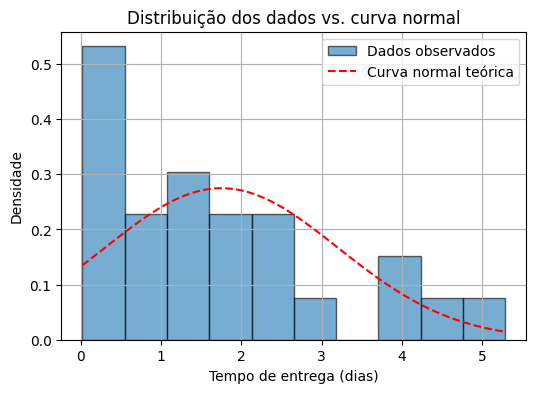

In [30]:
# Parâmetros da normal teórica (mesma média e desvio dos dados)
mu = np.mean(dados)
sigma = np.std(dados)

x = np.linspace(min(dados), max(dados), 100)
y = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(6, 4))
plt.hist(dados, bins=10, density=True, alpha=0.6, edgecolor='black', label='Dados observados')
plt.plot(x, y, color='red', linestyle='--', label='Curva normal teórica')
plt.title('Distribuição dos dados vs. curva normal')
plt.xlabel('Tempo de entrega (dias)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()


### Exemplo 6 - Interpretação do resultado

Neste exemplo, o teste de Shapiro-Wilk nos forneceu:

$$
W \approx 0{,}91 \\
p \approx 0{,}03
$$

Como $p < 0{,}05$, rejeitamos a hipótese nula $H_0$. Isso indica que os dados não seguem uma distribuição normal.

Visualmente, o histograma também mostra uma assimetria, reforçando o resultado do teste.


## Teste de Kolmogorov-Smirnov (K-S)

O teste de Kolmogorov-Smirnov é utilizado para comparar uma distribuição empírica de dados com uma distribuição teórica, como a normal, exponencial ou uniforme.

### Hipóteses

- $H_0$: os dados seguem a distribuição teórica especificada (por exemplo, normal)
- $H_1$: os dados não seguem a distribuição especificada

### Estatística do teste

A estatística do teste é dada por:

$$
D = \sup_x \left| F_n(x) - F(x) \right|
$$

Onde:

- $\sup_x$ é o supremo (ou valor máximo) sobre todos os $x$,
- $F_n(x)$ é a função de distribuição empírica (FDE) dos dados amostrados (ou seja, uma CDF empírica da amostra),
- $F(x)$ é a função de distribuição acumulada (CDF) da distribuição teórica.

### Interpretação

- Se o valor-p for menor que $\alpha$, rejeita-se $H_0$: os dados não seguem a distribuição teórica
- Se o valor-p for maior ou igual a $\alpha$, não se rejeita $H_0$: os dados podem ser considerados compatíveis com a distribuição especificada

### Observações

- O teste K-S é mais geral do que o teste de Shapiro-Wilk, pois pode ser usado com qualquer distribuição teórica contínua.
- Quando usado para verificar normalidade, é necessário que os parâmetros da normal (média e desvio padrão) sejam conhecidos e fixos.


### Exemplo 7

Um analista deseja verificar se os tempos de resposta de um servidor web seguem uma distribuição normal. Essa verificação é importante porque testes estatísticos posteriores (como análise de variância) assumem normalidade dos dados.

Ele coletou uma amostra de 50 tempos de resposta (em milissegundos).

### Exemplo 7 - Resolução:

Hipóteses:

- $H_0$: os dados seguem uma distribuição normal
- $H_1$: os dados não seguem uma distribuição normal


In [31]:
from scipy.stats import kstest, norm

# Simular dados com leve assimetria (não normal)
dados = np.random.gamma(shape=2, scale=2, size=50)

# Estimar média e desvio dos dados
mu = np.mean(dados)
sigma = np.std(dados)

# Teste de Kolmogorov-Smirnov comparando com uma normal estimada
estatistica, p_valor = kstest(dados, 'norm', args=(mu, sigma))

print(f'Estatística D = {estatistica:.4f}')
print(f'Valor-p = {p_valor:.4f}')

Estatística D = 0.0967
Valor-p = 0.7013


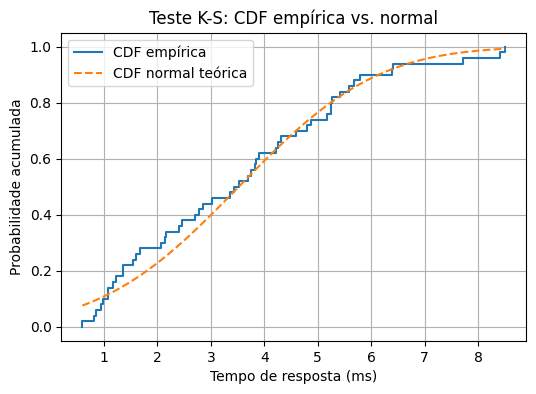

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF

# Função de distribuição empírica
ecdf = ECDF(dados)
x = np.linspace(min(dados), max(dados), 100)
cdf_normal = norm.cdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(6, 4))
plt.step(ecdf.x, ecdf.y, label='CDF empírica', where='post')
plt.plot(x, cdf_normal, label='CDF normal teórica', linestyle='--')
plt.title('Teste K-S: CDF empírica vs. normal')
plt.xlabel('Tempo de resposta (ms)')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True)
plt.show()

### Exemplo 7 - Interpretação do resultado

Neste exemplo, o teste de Kolmogorov-Smirnov produziu os seguintes resultados:

$$
D \approx 0{,}12 \\
p \approx 0{,}41
$$

Como $p > 0{,}05$, não rejeitamos a hipótese nula $H_0$.

Portanto, os dados podem ser considerados compatíveis com uma distribuição normal.

# Explicações adicionais

### Tipos de Testes de Hipóteses: Unicaudal vs. Bicaudal

#### Teste Bicaudal (Bilateral)

Hipóteses:

$$
H_0: \mu_1 = \mu_2 \\
H_1: \mu_1 \ne \mu_2
$$

- Interpretação: verifica se as médias são diferentes, sem importar a direção da diferença.  
- Tipo de teste: bicaudal

#### Teste Unicaudal à Direita

Hipóteses:

$$
H_0: \mu_1 \le \mu_2 \\
H_1: \mu_1 > \mu_2
$$

- Interpretação: verifica se a média do grupo 1 é maior que a do grupo 2.  
- Tipo de teste: unicaudal à direita


#### Teste Unicaudal à Esquerda

Hipóteses:

$$
H_0: \mu_1 \ge \mu_2 \\
H_1: \mu_1 < \mu_2
$$

- Interpretação: verifica se a média do grupo 1 é menor que a do grupo 2.  
- Tipo de teste: unicaudal à esquerda

#### Dica

A forma da hipótese alternativa $H_1$ define o tipo do teste:

- $H_1: \mu_1 \ne \mu_2$ → teste bicaudal  
- $H_1: \mu_1 > \mu_2$ → teste unicaudal à direita  
- $H_1: \mu_1 < \mu_2$ → teste unicaudal à esquerda


### O que são graus de liberdade?

Os graus de liberdade são um conceito essencial em estatística inferencial. Eles indicam quantos valores de um conjunto de dados podem variar livremente sem "quebrar" uma restrição matemática. Em outras palavras, representam quantas partes da informação permanecem livres depois de estimar parâmetros, como a média ou a soma total.

<br>

**Exemplo: (teste t)**  
  
Considere os valores $x_1, x_2, x_3, x_4, x_5$.  

Considere a média $\mu = 10$, logo:

$$
\frac{x_1 + x_2 + x_3 + x_4 + x_5}{5} = 10   \Longrightarrow   x_1 + x_2 + x_3 + x_4 + x_5 = 50
$$

No cálculo da variância amostral ou em um teste t, um grau de liberdade é "gasto" para estimar a média da amostra.
Assim, mesmo que existam 5 observações, apenas 4 podem variar livremente, porque o quinto valor é determinado pela condição de que a soma deve resultar em 50.

Se escolhermos 4 valores, o quinto já está determinado automaticamente para que a soma seja 50.  

Portanto: $df = 5 - 1 = 4$  
 
Esse 1 perdido é a restrição imposta por estimar a média.

<br>

**Exemplo: (teste qui-quadrado)**

Considere uma variável categórica com três categorias:  
A, B e C.

Suponha que as frequências esperadas sob a hipótese nula sejam:

| Categoria | Frequência esperada ($E_i$) |
|------------|-----------------------------|
| A | 20 |
| B | 30 |
| C | 50 |
| Total | 100 |

Agora, as frequências observadas ($O_i$) em uma amostra são:

| Categoria | Observado ($O_i$) | Esperado ($E_i$) |
|------------|------------------|------------------|
| A | 18 | 20 |
| B | 33 | 30 |
| C | 49 | 50 |

O valor do teste qui-quadrado é calculado por:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Como há 3 categorias, poderíamos pensar inicialmente em 3 valores livres ($O_A$, $O_B$, $O_C$).  
No entanto, há uma restrição: a soma das frequências observadas deve ser igual ao total ($\sum O_i = 100$).  

Assim, ao escolher os valores de duas categorias, o valor da terceira já fica determinado automaticamente.  

Se houver $k$ categorias e a soma das frequências for fixa, basta conhecer $k-1$ delas para determinar a última.
Por isso, o número de graus de liberdade é $df = k - 1$.

Portanto: $df = k - 1 = 3 - 1 = 2$  

O grau de liberdade perdido representa a restrição imposta pela soma total constante.  

#### Impacto nos testes estatísticos

Os graus de liberdade determinam a forma da distribuição teórica usada em diversos testes (t, qui-quadrado, etc).  

Portanto:  
- O df ajusta a forma da distribuição usada no teste.
- Isso altera o valor crítico e o p-valor correspondentes a um mesmo resultado.

Em resumo, os graus de liberdade expressam quantas informações realmente contribuem de forma independente para uma estimativa ou teste.
Eles traduzem, de forma matemática, a relação entre tamanho da amostra, número de parâmetros estimados e confiabilidade dos resultados.

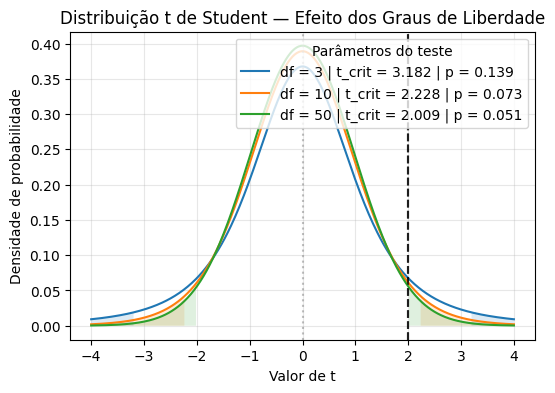

In [33]:
# Vamos avaliar o impacto de graus de liberar em um teste t sudent

# Parâmetros
t_calculado = 2.0  # estatística t calculada (vamos supor este valor)
alpha = 0.05       # nível de significância
dfs = [3, 10, 50]  # graus de liberdade (vamos exibir as curvas para 3 diferentes graus de liberadade)

# Geração de eixos
x = np.linspace(-4, 4, 400)

plt.figure(figsize=(6, 4))

for df in dfs:
    # Densidade da distribuição t
    y = t.pdf(x, df)
    
    # Valores críticos para α/2 em cada cauda
    t_crit = t.ppf(1 - alpha/2, df)
    
    # Valor p para t_obs
    p_value = 2 * (1 - t.cdf(abs(t_calculado), df))
    
    # Plot da curva
    plt.plot(x, y, label=f"df = {df} | t_crit = {t_crit:.3f} | p = {p_value:.3f}")
    
    # Áreas de rejeição (somente para df=3, 10 e 30 – sobrepostas)
    plt.fill_between(x, y, where=(x > t_crit) | (x < -t_crit), alpha=0.15)
    
    # Linha para t observado
    plt.axvline(t_calculado, color='black', linestyle='--', alpha=0.5)

# Linha vertical no zero
plt.axvline(0, color='gray', linestyle=':', alpha=0.5)

plt.title("Distribuição t de Student — Efeito dos Graus de Liberdade")
plt.xlabel("Valor de t")
plt.ylabel("Densidade de probabilidade")
plt.legend(title="Parâmetros do teste", loc="upper right")
plt.grid(alpha=0.3)
plt.show()


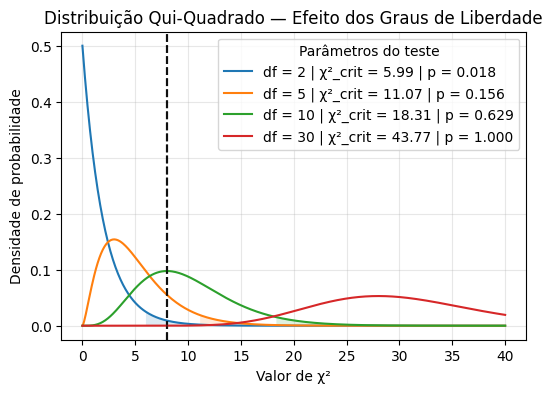

In [34]:
# Vamos avaliar o impacto de graus de liberar em um teste qui quadrado

# Parâmetros
alpha = 0.05          # nível de significância (cauda direita)
dfs = [2, 5, 10, 30]  # graus de liberdade (exemplos)
chi2_obs = 8.0        # estatística χ² observada (hipotética)

# Eixo x (valores possíveis de χ²)
x = np.linspace(0, 40, 500)

plt.figure(figsize=(6, 4))

for df in dfs:
    # PDF da distribuição qui-quadrado
    y = chi2.pdf(x, df)
    
    # Valor crítico (ponto de corte à direita)
    chi2_crit = chi2.ppf(1 - alpha, df)
    
    # Valor-p correspondente ao χ² observado
    p_value = 1 - chi2.cdf(chi2_obs, df)
    
    # Plot da curva
    plt.plot(x, y, label=f"df = {df} | χ²_crit = {chi2_crit:.2f} | p = {p_value:.3f}")
    
    # Área de rejeição (à direita de χ² crítico)
    plt.fill_between(x, y, where=(x > chi2_crit), alpha=0.15)
    
    # Linha para χ² observado
    plt.axvline(chi2_obs, color='black', linestyle='--', alpha=0.5)

plt.title("Distribuição Qui-Quadrado — Efeito dos Graus de Liberdade")
plt.xlabel("Valor de χ²")
plt.ylabel("Densidade de probabilidade")
plt.legend(title="Parâmetros do teste", loc="upper right")
plt.grid(alpha=0.3)
plt.show()


## PPF — Percent Point Function (Função Percentil)

A PPF (Percent Point Function) é o inverso da CDF (Cumulative Distribution Function): em vez de acumular probabilidade até certo ponto, ela indica qual ponto corresponde a uma probabilidade acumulada.

A ideia é:

- A CDF mostra quanto da área está acumulada até um valor `x`.

- A PPF mostra qual é o valor `x` que corresponde a uma certa área acumulada `p`.

A PPF mostra os valores críticos, limites, faixas e percentis associados a probabilidades específicas.  
Em outras palavras, ela converte probabilidade em valor real da variável.

Formalmente:

$$
\text{CDF}(x) = P(X \le x)
$$

$$
\text{PPF}(p) = x \text{ tal que } P(X \le x) = p \Longrightarrow \text{PPF}(p) = \text{CDF}^{-1}(p)
$$

Exemplo conceitual:

Considere uma distribuição normal padrão (média 0, desvio 1):

- CDF(1.96) = 0.975 → 97,5% dos valores estão abaixo de 1.96  
- PPF(0.975) = 1.96 → o valor x que deixa 97,5% da área à esquerda

Portanto, PPF(0.025) e PPF(0.975) dão os limites críticos de 95% da distribuição normal (bicaudal).

#### Utilidade em testes de hipóteses

Em testes estatísticos como o teste t, z, ou qui-quadrado, usamos a CDF e a PPF.

A CDF é usada para calcular o **valor-p** do teste, ou seja, a probabilidade de observar uma estatística tão extrema (ou mais) que a observada, assumindo que a hipótese nula é verdadeira.

Por exemplo, em um teste t bicaudal:

$$
p\text{-valor} = 2 \times (1 - \text{CDF}(|t_{calc}|, df))
$$

Aqui:
- $t_{calc}$ é a estatística t observada,
- $df$ são os graus de liberdade,
- A CDF fornece a área acumulada até $|t_{calc}|$,
- O valor-p é o dobro da área restante nas caudas.

A CDF é usada **depois de calcular o valor do teste**, para determinar a probabilidade associada a ele.

Já a PPF é usada para definir os valores críticos que delimitam a região de rejeição da hipótese nula.

Por exemplo, para um teste t bicaudal com nível de significância $\alpha = 0.05$:

$$
t_{crit} = \text{PPF}(1 - \frac{\alpha}{2}, df)
$$

Esse valor define o limite tal que apenas 2,5% da área da curva está à direita de $t_{crit}$ e 2,5% à esquerda de $-t_{crit}$.  
Valores além desses limites representam evidência suficiente para rejeitar $H_0$.

A PPF é usada **antes de observar o dado**, para estabelecer os limites de decisão.

De forma intuitiva:

- CDF: "Qual a chance de observar até aqui?"  
- PPF: "Até onde preciso ir para ter essa chance?"

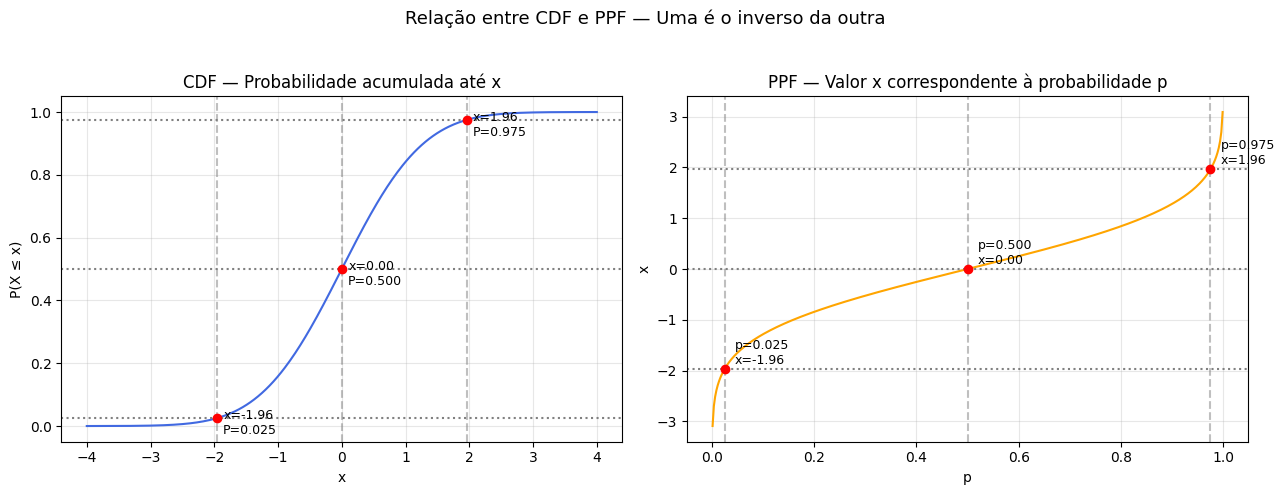

In [35]:
from scipy.stats import norm

# Parâmetros da distribuição normal padrão
mu, sigma = 0, 1
x = np.linspace(-4, 4, 400)
p = np.linspace(0.001, 0.999, 400)

# Funções CDF e PPF
cdf = norm.cdf(x, mu, sigma)
ppf = norm.ppf(p, mu, sigma)

# Pontos de exemplo (mesmos percentis)
ps = [0.025, 0.5, 0.975]
xs = [norm.ppf(pi, mu, sigma) for pi in ps]

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# CDF (esquerda)
axes[0].plot(x, cdf, color='royalblue')
axes[0].set_title("CDF — Probabilidade acumulada até x")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X ≤ x)")
axes[0].grid(alpha=0.3)

# Pontos e linhas de ligação
for pi, xi in zip(ps, xs):
    axes[0].axvline(xi, color='gray', linestyle='--', alpha=0.5)
    axes[0].axhline(pi, color='gray', linestyle=':')
    axes[0].plot(xi, pi, 'o', color='red')
    axes[0].text(xi+0.1, pi-0.05, f"x={xi:.2f}\nP={pi:.3f}", fontsize=9)

# PPF (direita)
axes[1].plot(p, ppf, color='orange')
axes[1].set_title("PPF — Valor x correspondente à probabilidade p")
axes[1].set_xlabel("p")
axes[1].set_ylabel("x")
axes[1].grid(alpha=0.3)

for pi, xi in zip(ps, xs):
    axes[1].axvline(pi, color='gray', linestyle='--', alpha=0.5)
    axes[1].axhline(xi, color='gray', linestyle=':')
    axes[1].plot(pi, xi, 'o', color='red')
    axes[1].text(pi+0.02, xi+0.1, f"p={pi:.3f}\nx={xi:.2f}", fontsize=9)

plt.suptitle("Relação entre CDF e PPF — Uma é o inverso da outra", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Guia – Como identificar o teste estatístico e formular hipóteses

Antes de aplicar qualquer teste estatístico, siga os passos abaixo para entender o problema e escolher a ferramenta correta.

#### Etapa 1: Compreenda o objetivo do problema

O que está sendo investigado?

- Comparar médias?
- Verificar se proporções mudaram?
- Testar se duas variáveis estão associadas?
- Verificar se os dados seguem uma distribuição?

#### Etapa 2: Classifique as variáveis

- Quantitativa (numérica)  
  Ex: tempo, altura, nota, vendas

- Categórica (qualitativa)  
  Ex: gênero, setor, sabor, canal de compra

#### Etapa 3: Perguntas para orientar a escolha do teste

Você quer comparar médias?

- Uma amostra vs. valor conhecido → Teste t para uma amostra
- Duas amostras independentes → Teste t para duas amostras
- Antes e depois na mesma unidade (pares) → Teste t pareado

Você quer comparar proporções?

- Uma proporção observada vs. valor esperado → Teste z para uma proporção
- Duas proporções de grupos distintos → Teste z para duas proporções

Você está lidando com categorias?

- Comparar frequências com uma distribuição teórica → Qui-quadrado de aderência
- Verificar associação entre duas variáveis categóricas → Qui-quadrado de independência

Você quer verificar se os dados são normais?

- Sim → Use um teste de normalidade, como:
  - Shapiro-Wilk (recomendado para amostras pequenas/médias)
  - Kolmogorov-Smirnov (quando a distribuição teórica é conhecida)

#### Etapa 4: Formule as hipóteses estatísticas

Sempre escreva as hipóteses nula ($H_0$) e alternativa ($H_1$).

Exemplos:

- Média:
  - $H_0$: $\mu$ = valor esperado
  - $H_1$: $\mu$ ≠ valor esperado (ou $\mu$ >, $\mu$ <)

- Proporção:
  - $H_0$: p = 0,30
  - $H_1$: p ≠ 0,30

- Associação:
  - $H_0$: As variáveis são independentes
  - $H_1$: As variáveis são associadas

- Normalidade:
  - $H_0$: Os dados seguem distribuição normal
  - $H_1$: Os dados não seguem distribuição normal

#### Etapa 5: Escolha o tipo de teste

- Unicaudal (direcional)  
  Se você quer saber se aumentou ou diminuiu especificamente.

- Bicaudal (não direcional)  
  Se você quer saber se houve diferença, sem especificar o lado.

#### Etapa 6: Verifique os requisitos

- Os dados são independentes?
- A amostra é suficientemente grande?
- As variáveis estão na escala correta?
- A distribuição é aproximadamente normal? (se o teste exigir)

#### Etapa 7: Faça e interprete o teste

- Calcule a estatística do teste e o valor-p
- Compare com o nível de significância (geralmente $\alpha$ = 0,05)
- Regra de decisão:
  - Se p < $\alpha$ → Rejeite $H_0$
  - Se p ≥ $\alpha$ → Não rejeite $H_0$

Dica: 

Interprete o resultado no contexto do problema. Evite frases genéricas. Sempre conclua com uma frase como:

"Com 95% de confiança, há evidência de que a média aumentou."

ou

"Não há evidência estatística de que as proporções sejam diferentes."

## Exercícios

Para cada um dos exercícios a seguir, proceda com:  
1. Compreensão do enunciado;
2. Análise do tipo de dado (quantitativo ou categórico);
3. Identificação do objetivo da análise (comparar médias, proporções, avaliar associação, verificar normalidade etc.);
4. Formulação de hipóteses;
5. Escolha do teste estatístico mais adequado;
6. Justificativa da resposta com base nos critérios estatísticos corretos.

### Exercício 1

Um hospital implementou uma nova dieta para pacientes diabéticos. Historicamente, a média de glicemia em jejum desses pacientes era de 110 mg/dL.

Após 30 dias de dieta, foi avaliada uma amostra de 20 pacientes, com média de 101,95 mg/dL e desvio padrão de 4,31 mg/dL.

Pergunta:  
Com nível de significância de 5%, há evidência estatística de que a nova dieta reduziu os níveis médios de glicemia?

In [ ]:
# Dados de glicemia em jejum (mg/dL) de 20 pacientes após a nova dieta:
glicemias = [107, 98, 110, 102, 100, 108, 95, 106, 99, 104, 101, 97, 96, 109, 105, 100, 103, 102, 98, 99]

media_historica_mu0 = 110.0
alpha = 0.05
n = len(glicemias)
# Média da amostra (x̄)
media_amostra_x_bar = np.mean(glicemias)
# Desvio padrão da amostra (s)
s = np.std(glicemias, ddof=1) # ddof=1 é para usar a fórmula de desvio padrão amostral (n-1)

print("Parâmetros da amostra")
print(f"n (Tamanho da amostra): {n}")
print(f"x̄ (Média da amostra): {media_amostra_x_bar:.2f}")
print(f"s (Desvio padrão da amostra): {s:.2f}")
print("-------------------------------------------------")

# Justificativa
print("Como está sendo comparado uma média de amostra com uma média histórica,")
print(" e o tamanho do grupo é pequeno, será feito uso do Teste t de Student.\n")

erro_padrao = s / np.sqrt(n)
# Estatística t (t = (x̄ - μ₀) / SE)
t_stat = (media_amostra_x_bar - media_historica_mu0) / erro_padrao

print("Cálculo do Teste t")
print(f"Erro Padrão (SE): {erro_padrao:.4f}")
print(f"Estatística t calculada (t): {t_stat:.4f}")
print("-------------------------------------------------")

# Cálculo do p-value (usando a estatística t calculada)
# O p-value é a probabilidade P(t < t_stat)
# Isso requer a Função de Distribuição Acumulada (CDF) da distribuição t.
graus_de_liberdade = n - 1
p_value_calculado = t.cdf(t_stat, df=graus_de_liberdade)

print("Cálculo do Valor-p")
print(f"Graus de Liberdade (n-1): {graus_de_liberdade}")
print(f"Valor-p (P[t < {t_stat:.4f}]): {p_value_calculado:.8f}")
print("-------------------------------------------------")
print("Análise Final")
print("Hipóteses:")
print("H0: μ ≥ 110 (A dieta não reduz os níveis de glicemia)")
print("H1: μ < 110 (A dieta reduz os níveis de glicemia)")
print("-------------------------------------------------")

if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.8f} < {alpha})")
    print("Há evidência estatística de que a dieta reduziu os níveis de glicemia.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.8f} > {alpha})")
    print("Não há evidência estatística de que a dieta reduziu os níveis de glicemia.")

Parâmetros da amostra
n (Tamanho da amostra): 20
x̄ (Média da amostra): 101.95
s (Desvio padrão da amostra): 4.43
-------------------------------------------------
Como está sendo comparado uma média de amostra com uma média histórica,
 e o tamanho do grupo é pequeno, será feito uso do Teste t de Student.

Cálculo do Teste t
Erro Padrão (SE): 0.9907
Estatística t calculada (t): -8.1257
-------------------------------------------------
Cálculo do Valor-p
Graus de Liberdade (n-1): 19
Valor-p (P[t < -8.1257]): 0.00000007
-------------------------------------------------
Análise Final
Hipóteses:
H0: μ ≥ 110 (A dieta não reduz os níveis de glicemia)
H1: μ < 110 (A dieta reduz os níveis de glicemia)
-------------------------------------------------
Rejeita H₀ (p-value = 0.00000007 < 0.05)
Há evidência estatística de que a dieta reduziu os níveis de glicemia.


### Exercício 2

Dois métodos de ensino de programação foram aplicados a dois grupos de alunos. Ao final do curso, os desempenhos (notas finais) foram:

Grupo A (método tradicional): 10 alunos, média 7.1, desvio padrão 0.24

Grupo B (método com projetos): 12 alunos, média 8.0, desvio padrão 0.43

Pergunta:  
Com $\alpha$ = 0,05, há evidência de que o método com projetos resulta em notas significativamente maiores?
Assuma variâncias iguais.

In [87]:
grupoA = [6.9, 7.4, 7.1, 7.0, 6.8, 7.2, 7.3, 6.7, 7.0, 7.5]
grupoB = [8.1, 7.8, 8.2, 8.0, 7.9, 8.3, 8.5, 7.7, 8.0, 8.1, 8.2, 7.6]
alpha = 0.05

# Cálculos das Propriedades das Amostras
n_A = len(grupoA)
n_B = len(grupoB)
media_A = np.mean(grupoA)
media_B = np.mean(grupoB)
# Variância amostral de cada grupo
var_A = np.var(grupoA, ddof=1) 
var_B = np.var(grupoB, ddof=1)

print("Cálculo das Propriedades da Amostra")
print(f"Grupo A: n={n_A}, média={media_A:.2f}, var={var_A:.4f}")
print(f"Grupo B: n={n_B}, média={media_B:.2f}, var={var_B:.4f}")
print("-------------------------------------------------")

# Justificativa
print("Como está sendo feita uma comparação de médias entre dois grupos independentes,")
print("e que o tamanho dos grupos é pequeno e que o exercício pede par assumir variâncias iguais,")
print("vamos usar Teste de t de Student para duas amostras independentes cde variâncias iguais.\n")

df = (n_A - 1) + (n_B - 1) # Graus de Liberdade (df)
s2_p = ( ((n_A - 1) * var_A) + ((n_B - 1) * var_B) ) / df # Variância Agrupada (Pooled Variance, s²p)
erro_padrao = np.sqrt(s2_p * ( (1/n_A) + (1/n_B) )) # Erro Padrão da Diferença

# Estatística t
t_stat = (media_B - media_A) / erro_padrao

print("Cálculo da Estatística t")
print(f"Graus de Liberdade (df): {df}")
print(f"Variância Agrupada (s²p): {s2_p:.4f}")
print(f"Erro Padrão da Diferença (SE): {erro_padrao:.4f}")
print(f"Estatística t calculada (t): {t_stat:.4f}")
print("-------------------------------------------------")

print("Hipóteses:")
print("H0: μ_B ≤ μ_A (As notas do Grupo B não são maiores que as do Grupo A)")
print("H1: μ_B > μ_A (As notas do Grupo B são maiores que as do Grupo A)")
print("-------------------------------------------------")


# Cálculo do p-value
# H1 é μ_B > μ_A, então queremos a área à DIREITA de t_stat
# Usamos a Survival Function (sf), que é 1 - cdf()
p_value_calculado = t.sf(t_stat, df=df)

print("Cálculo do Valor-p")
print(f"Valor-p (P[t > {t_stat:.4f}]): {p_value_calculado:.10f}")
print("-------------------------------------------------")

# 5. Conclusão
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.10f} < {alpha})")
    print("Há evidência estatística de que o método com projetos (Grupo B) resulta em notas significativamente maiores.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.10f} > {alpha})")
    print("Não há evidência estatística de que o método com projetos (Grupo B) resulta em notas significativamente maiores.")


Cálculo das Propriedades da Amostra
Grupo A: n=10, média=7.09, var=0.0677
Grupo B: n=12, média=8.03, var=0.0661
-------------------------------------------------
Como está sendo feita uma comparação de médias entre dois grupos independentes,
e que o tamanho dos grupos é pequeno e que o exercício pede par assumir variâncias iguais,
vamos usar Teste de t de Student para duas amostras independentes cde variâncias iguais.

Cálculo da Estatística t
Graus de Liberdade (df): 20
Variância Agrupada (s²p): 0.0668
Erro Padrão da Diferença (SE): 0.1107
Estatística t calculada (t): 8.5253
-------------------------------------------------
Hipóteses:
H0: μ_B ≤ μ_A (As notas do Grupo B não são maiores que as do Grupo A)
H1: μ_B > μ_A (As notas do Grupo B são maiores que as do Grupo A)
-------------------------------------------------
Cálculo do Valor-p
Valor-p (P[t > 8.5253]): 0.0000000215
-------------------------------------------------
Análise Final
Rejeita H₀ (p-value = 0.0000000215 < 0.05)
Há evi

### Exercício 3

Uma pesquisa foi feita com 80 consumidores sobre satisfação com um produto (Satisfeito / Insatisfeito) e canal de compra (Loja / Site):

|             | Satisfeito | Insatisfeito |
| ----------- | ---------- | ------------ |
| Loja física | 30         | 10           |
| Loja online | 25         | 15           |

Pergunta:  
Existe associação entre o canal de compra e o nível de satisfação do cliente? Use $\alpha$ = 0.05.

In [88]:
df = pd.DataFrame({
    "Satisfeito": [30, 25],
    "Insatisfeito": [10, 15]
}, index=["Loja Física", "Loja Online"])
alpha = 0.05

print("Como estamos comparando duas variáveis categóricas (Canal e Satisfação),")
print("para verificar se existe uma associação (dependência) entre elas,")
print("vamos usar o Teste Qui-Quadrado (χ²) de Independência.\n")
print("-------------------------------------------------")

print("Hipóteses:")
print("H₀: As variáveis são independentes (NÃO há associação).")
print("H₁: As variáveis não são independentes (HÁ associação).")
print("-------------------------------------------------")

# Cálculo das Frequências Esperadas (E)
total_linha = df.sum(axis=1) # por Canal
total_coluna = df.sum(axis=0) # por Satisfação
total_geral = total_coluna.sum() # Total Geral

# Fórmula: E = (Total da Linha * Total da Coluna) / Total Geral
expected = np.outer(total_linha, total_coluna) / total_geral
df_esperado = pd.DataFrame(expected, columns=df.columns, index=df.index)

print("Cálculo das Frequências Esperadas (E)")
print(df_esperado.round(2))
print("-------------------------------------------------")

# Cálculo da Estatística Qui-Quadrado (χ²)
# Fórmula: χ² = Σ [ (O - E)² / E ]
chi2_stat = np.sum( (df - df_esperado)**2 / df_esperado ).sum()

# Graus de Liberdade (df) = (Nº de Linhas - 1) * (Nº de Colunas - 1)
df = (len(total_linha) - 1) * (len(total_coluna) - 1)

print("Cálculo da Estatística χ²")
print(f"Graus de Liberdade (df): {df}")
print(f"Estatística χ² calculada: {chi2_stat:.4f}")
print("-------------------------------------------------")

# Cálculo do p-value
# Será usada a Survival Function (sf), que é 1 - cdf()
p_value_calculado = chi2.sf(chi2_stat, df=df)

print("Cálculo do Valor-p")
print(f"Valor-p (P[χ² > {chi2_stat:.4f}]): {p_value_calculado:.4f}")
print("-------------------------------------------------")

# Análise
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.4f} < {alpha})")
    print("Há evidência estatística de que o canal de compra esteja associado ao nível de satisfação.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.4f} > {alpha})")
    print("Não há evidência estatística de que exista associação entre o canal de compra e o nível de satisfação.")

Como estamos comparando duas variáveis categóricas (Canal e Satisfação),
para verificar se existe uma associação (dependência) entre elas,
vamos usar o Teste Qui-Quadrado (χ²) de Independência.

-------------------------------------------------
Hipóteses:
H₀: As variáveis são independentes (NÃO há associação).
H₁: As variáveis não são independentes (HÁ associação).
-------------------------------------------------
Cálculo das Frequências Esperadas (E)
             Satisfeito  Insatisfeito
Loja Física        27.5          12.5
Loja Online        27.5          12.5
-------------------------------------------------
Cálculo da Estatística χ²
Graus de Liberdade (df): 1
Estatística χ² calculada: 1.4545
-------------------------------------------------
Cálculo do Valor-p
Valor-p (P[χ² > 1.4545]): 0.2278
-------------------------------------------------
Análise Final
Aceita H₀ (p-value = 0.2278 > 0.05)
Não há evidência estatística de que exista associação entre o canal de compra e o nível de s

c:\Users\renan\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


### Exercício 4

Uma startup afirma que 70% dos seus usuários estão satisfeitos com o serviço. Em uma nova pesquisa com 200 usuários, apenas 128 disseram estar satisfeitos.

Pergunta:  
Há evidência de que a taxa de satisfação é diferente de 70%? Use teste bicaudal, com α = 0,05.

In [90]:
x = 128     # sucessos
n = 200     # total
p0 = 0.70   # proporção teórica
alpha = 0.05

# Cálculos das Propriedades da Amostra
p_hat = x / n # Proporção da amostra (p̂)

print("Cálculo das Propriedades da Amostra")
print(f"n Tamanho da amostra: {n}")
print(f"x Sucessos na amostra: {x}")
print(f"p̂ Proporção da amostra: {p_hat:.4f}")
print(f"p₀ Proporção teórica/H₀: {p0:.4f}")
print("-------------------------------------------------")

# Justificativa
print("Como estamos comparando a proporção de uma amostra com um valor teórico,")
print("e o tamanho da amostra é grande (n*p₀ >= 10 e n*(1-p₀) >= 10),")
print("vamos usar o Teste Z para uma proporção.\n")

check1 = n * p0 # quantos satisfeitos são esperados na amostra
check2 = n * (1 - p0) # quantos insatisfeitos são esperados na amostra
print("Verificação do tamanho da amostra para o uso do Teste Z")
print(f"Checagem (n*p₀): {check1:.0f} >= 10 (Ok)")
print(f"Checagem (n*(1-p₀)): {check2:.0f} >= 10 (Ok)")
print("-------------------------------------------------")

# Hipóteses
print("Hipóteses (Bicaudal):")
print(f"H₀: p = {p0} (A taxa de satisfação é 70%)")
print(f"H₁: p ≠ {p0} (A taxa de satisfação é diferente de 70%)")
print("-------------------------------------------------")

# Cálculo da Estatística Z
erro_padrao_SE = np.sqrt( (p0 * (1 - p0)) / n ) # Erro Padrão (SE) - usa p0, a proporção da H₀
z_stat = (p_hat - p0) / erro_padrao_SE # Estatística Z

print("Cálculo de Z")
print(f"Erro Padrão (SE): {erro_padrao_SE:.4f}")
print(f"Estatística Z calculada (Z): {z_stat:.4f}")
print("-------------------------------------------------")

# Cálculo do p-value (Bicaudal)
# Como é bicaudal, será 2 * (área da cauda)
# Como Z é negativo, será calculada a área à esquerda e multiplicada por 2
p_value_calculado = 2 * norm.cdf(z_stat)

print("Cálculo do Valor-p")
print(f"Valor-p Bicaudal: {p_value_calculado:.4f}")
print("-------------------------------------------------")

# Análise
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.4f} < {alpha})")
    print("Há evidência estatística de que a taxa de satisfação é diferente de 70%.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.4f} > {alpha})")
    print("Não há evidência estatística de que a taxa de satisfação seja diferente de 70%.")


Cálculo das Propriedades da Amostra
n Tamanho da amostra: 200
x Sucessos na amostra: 128
p̂ Proporção da amostra: 0.6400
p₀ Proporção teórica/H₀: 0.7000
-------------------------------------------------
Como estamos comparando a proporção de uma amostra com um valor teórico,
e o tamanho da amostra é grande (n*p₀ >= 10 e n*(1-p₀) >= 10),
vamos usar o Teste Z para uma proporção.

Verificação do tamanho da amostra para o uso do Teste Z
Checagem (n*p₀): 140 >= 10 (Ok)
Checagem (n*(1-p₀)): 60 >= 10 (Ok)
-------------------------------------------------
Hipóteses (Bicaudal):
H₀: p = 0.7 (A taxa de satisfação é 70%)
H₁: p ≠ 0.7 (A taxa de satisfação é diferente de 70%)
-------------------------------------------------
Cálculo de Z
Erro Padrão (SE): 0.0324
Estatística Z calculada (Z): -1.8516
-------------------------------------------------
Cálculo do Valor-p
Valor-p Bicaudal: 0.0641
-------------------------------------------------
Análise Final
Aceita H₀ (p-value = 0.0641 > 0.05)
Não há evi

### Exercício 5

Duas campanhas publicitárias foram testadas:

- Campanha A: 500 visitantes, 75 cliques
- Campanha B: 480 visitantes, 60 cliques

Pergunta:
Com 5% de significância, as taxas de clique nas campanhas são significativamente diferentes?


In [92]:
cliques = [75, 60]
n = [500, 480]
alpha = 0.05

x_A, x_B = cliques[0], cliques[1]
n_A, n_B = n[0], n[1]

# Cálculos das Propriedades das Amostras
# Proporção da amostras A e B
p_hat_A = x_A / n_A 
p_hat_B = x_B / n_B

print("Cálculo das Propriedades da Amostra")
print(f"Campanha A: n={n_A}, x={x_A}, p̂_A={p_hat_A:.4f}")
print(f"Campanha B: n={n_B}, x={x_B}, p̂_B={p_hat_B:.4f}")
print(f"Diferença observada (p̂_A - p̂_B): {p_hat_A - p_hat_B:.4f}")
print("-------------------------------------------------")

# Justificativa
print("Como estamos comparando as proporções de duas amostras independentes,")
print("e os tamanhos das amostras são grandes,")
print("vamos usar o Teste-Z para duas proporções.")
print("-------------------------------------------------")

# Hipóteses
print("Hipóteses (Bicaudal):")
print("H₀: p_A = p_B (As taxas de clique são iguais)")
print("H₁: p_A ≠ p_B (As taxas de clique são diferentes)")
print("-------------------------------------------------")

# Cálculo de Z
# Para o Erro Padrão (SE) sob H₀, será feito uso da Proporção Agrupada (Pooled)
p_pool = (x_A + x_B) / (n_A + n_B)
erro_padrao = np.sqrt( p_pool * (1 - p_pool) * ( (1/n_A) + (1/n_B) ) )

# Estatística Z
z_stat = (p_hat_A - p_hat_B) / erro_padrao

print("Cálculo de Z")
print(f"Proporção Agrupada (p_pool): {p_pool:.4f}")
print(f"Erro Padrão (SE): {erro_padrao:.4f}")
print(f"Estatística Z: {z_stat:.4f}")
print("-------------------------------------------------")

# Cálculo do p-value (Bicaudal)
# Como é bicaudal, será 2 * (área da cauda maior)
# e como Z é positivo, então é calculado a área à direita e multiplicado por 2
p_value_calculado = 2 * norm.sf(z_stat)

print("Cálculo do Valor-p")
print(f"Valor-p (Bicaudal): {p_value_calculado:.4f}")
print("-------------------------------------------------")

# Análise
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.4f} < {alpha})")
    print("Há evidência estatística de que as taxas de clique são diferentes.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.4f} > {alpha})")
    print("Não há evidência estatística de que as taxas de clique sejam diferentes.")

Cálculo das Propriedades da Amostra
Campanha A: n=500, x=75, p̂_A=0.1500
Campanha B: n=480, x=60, p̂_B=0.1250
Diferença observada (p̂_A - p̂_B): 0.0250
-------------------------------------------------
Como estamos comparando as proporções de duas amostras independentes,
e os tamanhos das amostras são grandes,
vamos usar o Teste-Z para duas proporções.
-------------------------------------------------
Hipóteses (Bicaudal):
H₀: p_A = p_B (As taxas de clique são iguais)
H₁: p_A ≠ p_B (As taxas de clique são diferentes)
-------------------------------------------------
Cálculo de Z
Proporção Agrupada (p_pool): 0.1378
Erro Padrão (SE): 0.0220
Estatística Z: 1.1352
-------------------------------------------------
Cálculo do Valor-p
Valor-p (Bicaudal): 0.2563
-------------------------------------------------
Análise Final
Aceita H₀ (p-value = 0.2563 > 0.05)
Não há evidência estatística de que as taxas de clique sejam diferentes.


### Exercício 6

Um pesquisador quer aplicar testes paramétricos em uma amostra de dados de salários (em milhares) de 30 funcionários de uma empresa.

Pergunta:  
Os dados de salários seguem uma distribuição normal? Use o teste de Shapiro-Wilk com α = 0,05.

In [ ]:
salarios = [
    3200, 3100, 2900, 3050, 3000, 3150, 2950, 3100, 3050, 2900,
    3000, 3100, 3200, 2950, 3050, 3000, 3150, 3100, 3000, 2950,
    3100, 3050, 2950, 2900, 3200, 3000, 3100, 2950, 3050, 3000
]
alpha = 0.05

print("Análise inicial")
print(f"n (Tamanho da amostra): {len(salarios)}")
print(f"Média (referência): {np.mean(salarios):.2f}")
print("-------------------------------------------------")

# Justificativa
print("O objetivo é verificar se os dados de uma amostra seguem uma")
print("distribuição normal, um pré-requisito para testes paramétricos,")
print("onde será feito uso do Teste de Shapiro-Wilk.")
print("-------------------------------------------------")

# Hipóteses
print("Hipóteses:")
print("H₀: Os dados seguem uma distribuição normal.")
print("H₁: Os dados não seguem uma distribuição normal.")
print("-------------------------------------------------")

# Cálculo da Estatística Shapiro-Wilk
shapiro_stat, p_value_calculado = shapiro(salarios)

print("Cálculo da Estatística Shapiro-Wilk")
print(f"Estatística W: {shapiro_stat:.4f}")
print(f"Valor-p (p-value): {p_value_calculado:.4f}")
print("-------------------------------------------------")

# Análise 
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.4f} < {alpha})")
    print("Os dados NÃO seguem uma distribuição normal.")
    print("A aplicação de testes paramétricos não é recomendada.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.4f} > {alpha})")
    print("Os dados seguem uma distribuição normal.")
    print("A aplicação de testes paramétricos é apropriada.")



Análise inicial
n (Tamanho da amostra): 30
Média (referência): 3040.00
-------------------------------------------------
O objetivo é verificar se os dados de uma amostra seguem uma
distribuição normal, um pré-requisito para testes paramétricos,
onde será feito uso do Teste de Shapiro-Wilk.
-------------------------------------------------
Hipóteses:
H₀: Os dados seguem uma distribuição normal.
H₁: Os dados não seguem uma distribuição normal.
-------------------------------------------------
Cálculo da Estatística Shapiro-Wilk
Estatística W: 0.9431
Valor-p (p-value): 0.1105
-------------------------------------------------
Análise Final
Aceitar H₀ (p-value = 0.1105 > 0.05)
Os dados seguem uma distribuição normal.
A aplicação de testes paramétricos é apropriada.


### Exercício 7

O tempo de resposta (em segundos) de um novo sistema web foi medido em 100 ocasiões. O analista quer verificar se os tempos seguem uma distribuição normal.

Pergunta:  
Utilizando o teste de Kolmogorov-Smirnov, os tempos podem ser considerados normalmente distribuídos? Use α = 0,05.

In [93]:
tempos = [
    1.3745, 1.2793, 1.3972, 1.5285, 1.2649, 1.2649, 1.5369, 1.4151, 1.2296, 1.3814,
    1.2305, 1.2301, 1.3363, 1.0130, 1.0413, 1.2157, 1.1481, 1.3471, 1.1638, 1.0882,
    1.5198, 1.2661, 1.3101, 1.0863, 1.2183, 1.3166, 1.1274, 1.3564, 1.2099, 1.2562,
    1.2097, 1.5778, 1.2980, 1.1413, 1.4234, 1.1169, 1.3313, 1.0060, 1.1008, 1.3295,
    1.4108, 1.3257, 1.2827, 1.2548, 1.0782, 1.1920, 1.2309, 1.4586, 1.3515, 1.0355,
    1.3486, 1.2422, 1.1985, 1.3918, 1.4546, 1.4397, 1.1741, 1.2536, 1.3497, 1.4463,
    1.2281, 1.2722, 1.1340, 1.1206, 1.4219, 1.5034, 1.2892, 1.4505, 1.3542, 1.2032,
    1.3542, 1.5307, 1.2946, 1.5347, 0.9070, 1.4233, 1.3131, 1.2551, 1.3138, 1.0019,
    1.2670, 1.3536, 1.5217, 1.2223, 1.1787, 1.2247, 1.4373, 1.3493, 1.2205, 1.3770,
    1.3146, 1.4453, 1.1947, 1.2509, 1.2412, 1.0805, 1.3444, 1.3392, 1.3008, 1.2648
]
alpha = 0.05

# Justificativa
print("O objetivo é verificar se os dados seguem uma distribuição normal.")
print("Será feito uso do Teste de Kolmogorov-Smirnov (K-S), onde terá")
print("uma CDF empírica com a CDF de uma Normal teórica.")
print("-------------------------------------------------")

# Hipóteses
print("Hipóteses:")
print("H₀: Os dados SEGUEM uma distribuição normal.")
print("H₁: Os dados NÃO SEGUEM uma distribuição normal.")
print("-------------------------------------------------")

# Cálculo da Estatística de Kolmogorov-Smirnov
# Para o K-S, é preciso estimar os parâmetros da normal (μ e σ)
# a partir da própria amostra.
mu_estimado = np.mean(tempos)
sigma_estimado = np.std(tempos, ddof=1)

# Realiza o teste K-S contra uma normal com os parâmetros estimados
ks_stat, p_value_calculado = kstest(tempos, 'norm', args=(mu_estimado, sigma_estimado))

print("Cálculo de K-S")
print(f"Parâmetros estimados da Normal: μ={mu_estimado:.4f}, σ={sigma_estimado:.4f}")
print(f"Estatística D (K-S) calculada: {ks_stat:.4f}")
print(f"Valor-p (p-value): {p_value_calculado:.4f}")
print("-------------------------------------------------")

# Análise
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.4f} < {alpha})")
    print("Os dados nâo seguem uma distribuição normal.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.4f} > {alpha})")
    print("Os dados podem ser considerados como de uma distribuição normal.")


O objetivo é verificar se os dados seguem uma distribuição normal.
Será feito uso do Teste de Kolmogorov-Smirnov (K-S), onde terá
uma CDF empírica com a CDF de uma Normal teórica.
-------------------------------------------------
Hipóteses:
H₀: Os dados SEGUEM uma distribuição normal.
H₁: Os dados NÃO SEGUEM uma distribuição normal.
-------------------------------------------------
Cálculo de K-S
Parâmetros estimados da Normal: μ=1.2844, σ=0.1362
Estatística D (K-S) calculada: 0.0517
Valor-p (p-value): 0.9396
-------------------------------------------------
Análise Final
Aceita H₀ (p-value = 0.9396 > 0.05)
Os dados podem ser considerados como de uma distribuição normal.


### Exercício 8

Um fabricante de iogurtes deseja saber se os consumidores têm preferência entre três sabores: morango, banana e ameixa. Foram registradas as escolhas de 90 pessoas.

Pergunta:  
Qual teste estatístico deve ser aplicado para verificar se a distribuição das escolhas é diferente de uma distribuição uniforme (sem preferência)?

In [94]:
observado = np.array([32, 28, 30])
esperado = np.array([30, 30, 30])  # distribuição uniforme
alpha = 0.05

print("Tabela de Frequências")
print(f"Observado (O): {observado}")
print(f"Esperado (E): {esperado}")
print(f"Total de Observações: {np.sum(observado)}")
print("-------------------------------------------------")

# Justificativa
print("Como estamos comparando as contagens observadas de uma variável categórica")
print("com um conjunto de contagens esperadas (distribuição uniforme),")
print("vamos usar o Teste Qui-Quadrado (χ²) de aderência.")
print("-------------------------------------------------")

# Hipóteses
print("Hipóteses:")
print("H₀: As escolhas observadas são compativeis com a distribuição uniforme (não há preferência).")
print("H₁: As escolhas observadas não são compativeis com a distribuição uniforme (há preferência).")
print("-------------------------------------------------")

# Cálculo da Estatística de Qui-Quadrado (χ²)
# Fórmula: χ² = Σ [ (O - E)² / E ]
chi2_stat = np.sum( (observado - esperado)**2 / esperado )

# Graus de Liberdade (df) = k - 1 (onde k = número de categorias)
k = len(observado)
df = k - 1

print("Cálculo da Estatística χ²")
print(f"Graus de Liberdade (k-1): {df}")
print(f"Estatística χ² calculada: {chi2_stat:.4f}")
print("-------------------------------------------------")

# Cálculo do p-value
# Será usado a Survival Function (sf), que é 1 - cdf()
p_value_calculado = chi2.sf(chi2_stat, df=df)

print("Cálculo do Valor-p")
print(f"Valor-p (P[χ² > {chi2_stat:.4f}]): {p_value_calculado:.4f}")
print("-------------------------------------------------")

# Análise
print("Análise Final")
if p_value_calculado < alpha:
    print(f"Rejeita H₀ (p-value = {p_value_calculado:.4f} < {alpha})")
    print("Há evidência estatística de que existe preferência por algum sabor.")
else:
    print(f"Aceita H₀ (p-value = {p_value_calculado:.4f} > {alpha})")
    print("Não há evidência estatística de que exista preferência, ou seja, as escolhas são uniformes.")

Tabela de Frequências
Observado (O): [32 28 30]
Esperado (E): [30 30 30]
Total de Observações: 90
-------------------------------------------------
Como estamos comparando as contagens observadas de uma variável categórica
com um conjunto de contagens esperadas (distribuição uniforme),
vamos usar o Teste Qui-Quadrado (χ²) de aderência.
-------------------------------------------------
Hipóteses:
H₀: As escolhas observadas são compativeis com a distribuição uniforme (não há preferência).
H₁: As escolhas observadas não são compativeis com a distribuição uniforme (há preferência).
-------------------------------------------------
Cálculo da Estatística χ²
Graus de Liberdade (k-1): 2
Estatística χ² calculada: 0.2667
-------------------------------------------------
Cálculo do Valor-p
Valor-p (P[χ² > 0.2667]): 0.8752
-------------------------------------------------
Análise Final
Aceita H₀ (p-value = 0.8752 > 0.05)
Não há evidência estatística de que exista preferência, ou seja, as escolhas